<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_1_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 1 - Entrenando redes feedforward

**Autores:**

+ Nombre autor 1
+ Nombre autor 2

**Correos Electrónicos:**

+ Correo autor 1
+ Correo autor 2

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Deep Learning de la carrera de Ingeniería en Informática de DuocUC sede Concepción.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [2]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-09 08:19:57--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  9.34MB/s    in 1.0s    

2025-04-09 08:19:59 (9.34 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-04-09 08:19:59--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [a

In [3]:
!ls -lh

total 12M
drwxr-xr-x 1 root root 4.0K Apr  7 13:43 sample_data
-rw-r--r-- 1 root root 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [4]:
import gzip
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
# Asegurar que las etiquetas están en formato correcto
from keras.utils import to_categorical

#Introduccion

Introducción: Descripción del problema y objetivo del modelo.


# Carga de imágenes

In [5]:
# Función para cargar imágenes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Función para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificación

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


Describe en detalle el proceso de carga y preprocesamiento de datos, justificando las decisiones tomadas.

.#Explicar la normalizacion y el one-hot, agregar tambien la distribucion de las fotos, saber cuantas fotos de x numeros tenemos, poner cuantas imagenes tenemos para entrenamiento y testeo, tamaño de las fotos,

# Muestra imágenes

In [7]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

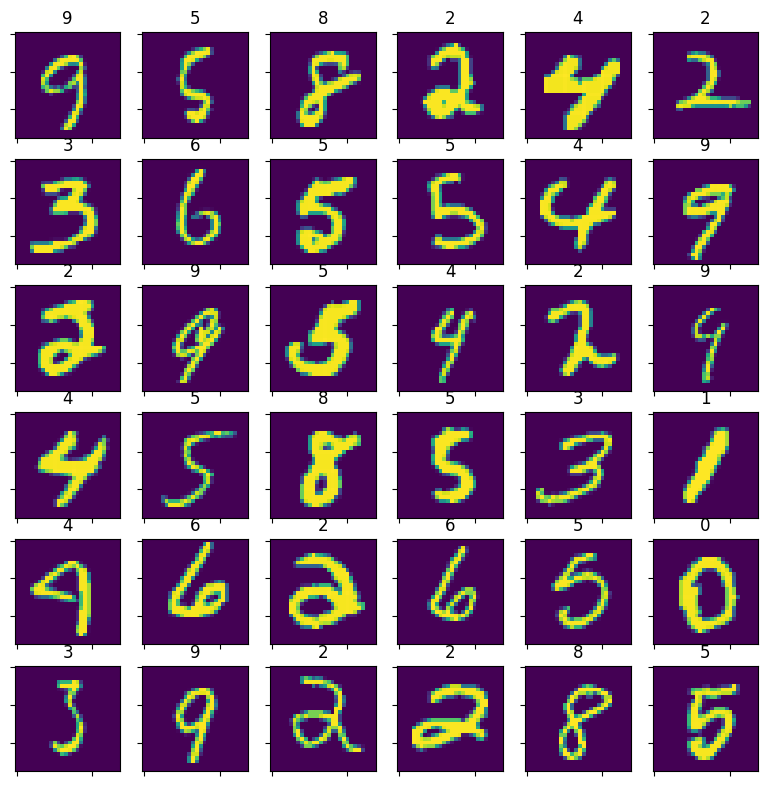

In [10]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [15]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de imágenes del número {i}: {numimagen[i]}")

Cantidad de imágenes del número 0: 5923.0
Cantidad de imágenes del número 1: 6742.0
Cantidad de imágenes del número 2: 5958.0
Cantidad de imágenes del número 3: 6131.0
Cantidad de imágenes del número 4: 5842.0
Cantidad de imágenes del número 5: 5421.0
Cantidad de imágenes del número 6: 5918.0
Cantidad de imágenes del número 7: 6265.0
Cantidad de imágenes del número 8: 5851.0
Cantidad de imágenes del número 9: 5949.0


In [16]:
plt.figure(figsize=(10, 6))
plt.bar( numimagen, color='skyblue')
plt.title('Cantidad de imágenes por número (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('Número', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de imágenes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x600 with 0 Axes>

#Configuracion de parametros(?

:##Definir que metricas vamos a usar y que oprimizador

.#Explicacion de que es épocas,batch size,optimizadores,loss?. ##Esto como introduccion a que dsp de experimentar podemos agregar la importancia de cada uno y se complementaria.

In [11]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


In [12]:
# Setea los seed para números random
np.random.seed(29)
tf.random.set_seed(29)

El propósito principal de establecer las semillas de los generadores de números aleatorios es permitir la reproducibilidad del código. Al fijar estas semillas, se asegura que cualquier persona que ejecute este código bajo las mismas condiciones (misma versión de librerías, hardware, etc.) obtendrá los mismos resultados. Esto es fundamental para la investigación científica, ya que permite validar resultados y compararlos en diferentes pruebas.

In [19]:
h1 = 512
h2 = 256
h3 = 128

In [20]:
red = keras.Sequential(name="Mi_Red")
red.add(keras.layers.Dense(h1))
red.add(keras.layers.Dense(h2))
red.add(keras.layers.Dense(h3))
red.add(keras.layers.Dense(C))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist = red.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 342s 6ms/step - accuracy: 0.1668 - loss: 9.7147 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 384s 6ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 355s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 337s 6ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 361s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 308s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 304s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 323s 5ms/step - ac

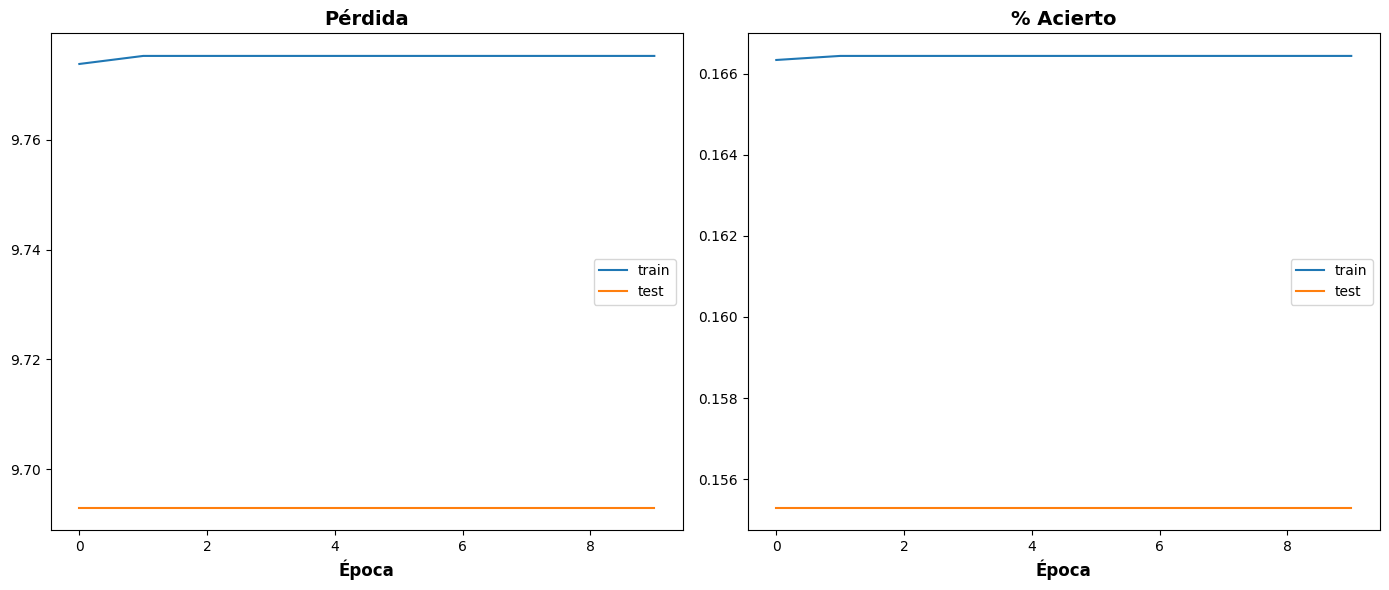

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist.history['loss'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_title('Pérdida', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist.history['accuracy'], label="train")
axs[1].plot(hist.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [14]:
# Escriba su código acá


red1 = keras.Sequential(name="Mi_Red")
red1.add(keras.layers.Input(shape=(N,), name='entrada'))
red1.add(keras.layers.Dense(h1, activation='relu'))
red1.add(keras.layers.Dense(h2, activation='relu'))
red1.add(keras.layers.Dense(h3, activation='relu'))
red1.add(keras.layers.Dense(C, activation='softmax'))

red1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist1 = red1.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 328s 5ms/step - accuracy: 0.8905 - loss: 0.3473 - val_accuracy: 0.9617 - val_loss: 0.1232
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 316s 5ms/step - accuracy: 0.9705 - loss: 0.0984 - val_accuracy: 0.9674 - val_loss: 0.1101
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 297s 5ms/step - accuracy: 0.9809 - loss: 0.0651 - val_accuracy: 0.9718 - val_loss: 0.0988
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 291s 5ms/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.9740 - val_loss: 0.1088
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 298s 5ms/step - accuracy: 0.9876 - loss: 0.0421 - val_accuracy: 0.9731 - val_loss: 0.1111
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 348s 5ms/step - accuracy: 0.9898 - loss: 0.0345 - val_accuracy: 0.9726 - val_loss: 0.1118
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 362s 5ms/step - accuracy: 0.9908 - loss: 0.0279 - val_accuracy: 0.9778 - val_loss: 0.0899
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 322s 5ms/step - ac

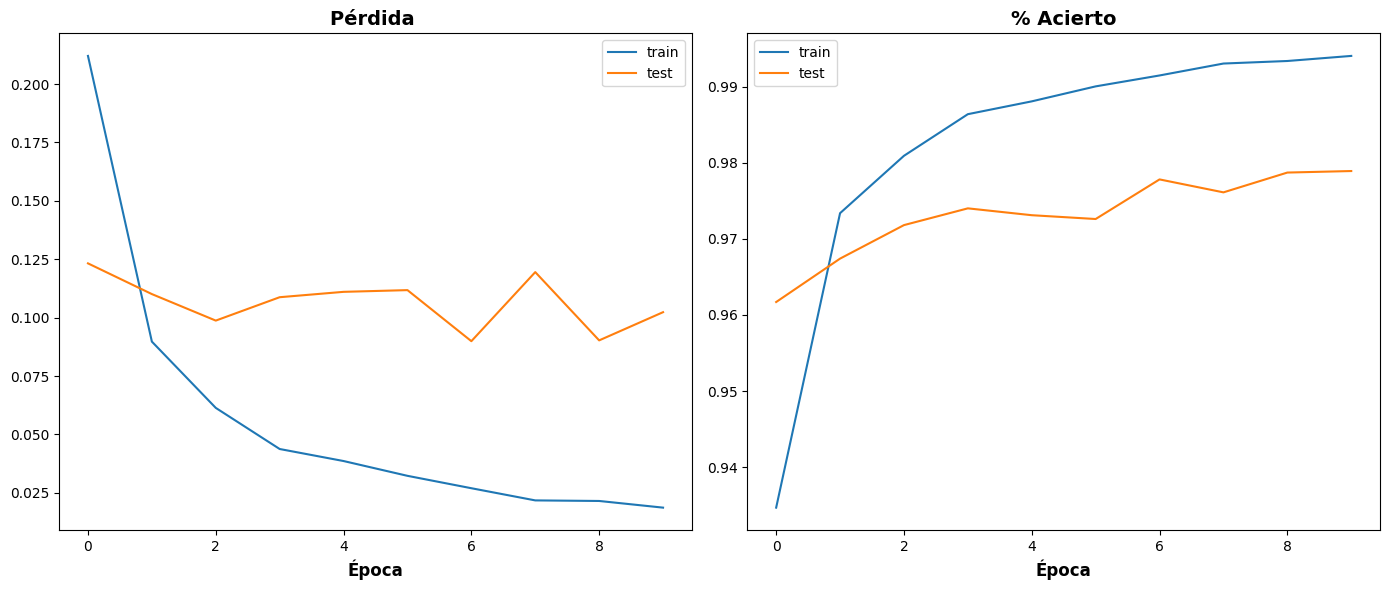

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist1.history['loss'], label="train")
axs[0].plot(hist1.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist1.history['accuracy'], label="train")
axs[1].plot(hist1.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()
